In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('data.csv')
df

,DateTime,Births per 1000 People,indicator corruption index,Home Ownership Rate,GDP per Capita,Average Monthly Wage,Consumer Spending,Youth Unemployment Rate,Unemployment Rate,Personal Savings,Labor Force Participation Rate,Inflation Rate,Housing Index,Food Inflation,Consumer Price Index CPI
0,1999-12-31T00:00:00,9.662,77,48.2,25237.48,11368.75,240226.50,7.56,6.25,3.75,61.37,-3.94,54.84,-1.83,73.64
1,2000-12-31T00:00:00,9.355,77,51.1,26933.06,11357.00,251074.50,5.96,5.11,4.47,61.32,-3.73,48.99,-2.18,70.90
2,2001-12-31T00:00:00,9.049,79,52.2,26885.24,11334.75,254590.50,5.97,4.93,2.17,61.48,-1.60,42.15,-0.81,69.76
3,2002-12-31T00:00:00,8.742,82,53.0,27209.87,10965.00,251926.50,8.17,7.22,0.14,61.79,-3.05,38.02,-2.08,67.63
4,2003-12-31T00:00:00,8.436,80,53.4,28096.90,10807.25,248003.25,8.80,7.90,0.00,61.50,-2.60,33.50,-1.60,65.90
5,2004-12-31T00:00:00,8.558,80,54.3,30304.08,10493.50,265679.25,6.98,6.88,0.02,61.32,-0.43,45.61,1.08,65.64
6,2005-12-31T00:00:00,8.680,83,53.7,32401.14,10532.00,275093.75,6.24,5.70,0.97,61.03,0.98,53.35,1.75,66.24
7,2006-12-31T00:00:00,8.802,83,53.5,34457.76,10956.00,291862.25,5.65,4.84,2.50,61.22,2.06,52.64,1.76,67.57
8,2007-12-31T00:00:00,8.924,83,53.1,36371.39,11369.00,317103.00,4.75,4.12,2.10,61.26,2.01,56.65,4.26,68.94
9,2008-12-31T00:00:00,9.046,81,53.6,36923.80,11375.00,323126.25,4.50,3.50,0.10,60.90,4.30,67.30,10.20,71.90


In [3]:
matrix_of_x = df.loc[:, ['indicator corruption index',
       'Home Ownership Rate', 'GDP per Capita', 'Average Monthly Wage',
       'Consumer Spending', 'Youth Unemployment Rate', 'Unemployment Rate',
       'Personal Savings', 'Labor Force Participation Rate', 'Inflation Rate',
       'Housing Index', 'Food Inflation', 'Consumer Price Index CPI']]

In [4]:
#Min-Max normolisation
df_min_max_scaled = matrix_of_x.copy()

for column in df_min_max_scaled.columns:
   df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

x_normed = df_min_max_scaled
x_normed

,indicator corruption index,Home Ownership Rate,GDP per Capita,Average Monthly Wage,Consumer Spending,Youth Unemployment Rate,Unemployment Rate,Personal Savings,Labor Force Participation Rate,Inflation Rate,Housing Index,Food Inflation,Consumer Price Index CPI
0,0.3,0.000000,0.000000,0.132318,0.000000,0.711628,0.674556,0.838926,0.804651,0.000000,0.148040,0.028271,0.235433
1,0.3,0.475410,0.084598,0.130542,0.042192,0.339535,0.449704,1.000000,0.781395,0.022777,0.107458,0.000000,0.154797
2,0.5,0.655738,0.082212,0.127178,0.055867,0.341860,0.414201,0.485459,0.855814,0.253796,0.060007,0.110662,0.121248
3,0.8,0.786885,0.098409,0.071280,0.045506,0.853488,0.865878,0.031320,1.000000,0.096529,0.031356,0.008078,0.058564
4,0.6,0.852459,0.142666,0.047432,0.030247,1.000000,1.000000,0.000000,0.865116,0.145336,0.000000,0.046850,0.007652
5,0.6,1.000000,0.252790,0.000000,0.098995,0.576744,0.798817,0.004474,0.781395,0.380694,0.084010,0.263328,0.000000
6,0.9,0.901639,0.357419,0.005820,0.135612,0.404651,0.566075,0.217002,0.646512,0.533623,0.137704,0.317447,0.017657
7,0.9,0.868852,0.460031,0.069919,0.200831,0.267442,0.396450,0.559284,0.734884,0.650759,0.132778,0.318255,0.056798
8,0.9,0.803279,0.555509,0.132356,0.299002,0.058140,0.254438,0.469799,0.753488,0.645336,0.160597,0.520194,0.097116
9,0.7,0.885246,0.583070,0.133263,0.322428,0.000000,0.132150,0.022371,0.586047,0.893709,0.234478,1.000000,0.184226


In [5]:
y = df[['Births per 1000 People']]
y

,Births per 1000 People
0,9.662
1,9.355
2,9.049
3,8.742
4,8.436
5,8.558
6,8.680
7,8.802
8,8.924
9,9.046


In [6]:
x_train = df_min_max_scaled.iloc[:15,:] #1999-2014
x_train

,indicator corruption index,Home Ownership Rate,GDP per Capita,Average Monthly Wage,Consumer Spending,Youth Unemployment Rate,Unemployment Rate,Personal Savings,Labor Force Participation Rate,Inflation Rate,Housing Index,Food Inflation,Consumer Price Index CPI
0,0.3,0.000000,0.000000,0.132318,0.000000,0.711628,0.674556,0.838926,0.804651,0.000000,0.148040,0.028271,0.235433
1,0.3,0.475410,0.084598,0.130542,0.042192,0.339535,0.449704,1.000000,0.781395,0.022777,0.107458,0.000000,0.154797
2,0.5,0.655738,0.082212,0.127178,0.055867,0.341860,0.414201,0.485459,0.855814,0.253796,0.060007,0.110662,0.121248
3,0.8,0.786885,0.098409,0.071280,0.045506,0.853488,0.865878,0.031320,1.000000,0.096529,0.031356,0.008078,0.058564
4,0.6,0.852459,0.142666,0.047432,0.030247,1.000000,1.000000,0.000000,0.865116,0.145336,0.000000,0.046850,0.007652
5,0.6,1.000000,0.252790,0.000000,0.098995,0.576744,0.798817,0.004474,0.781395,0.380694,0.084010,0.263328,0.000000
6,0.9,0.901639,0.357419,0.005820,0.135612,0.404651,0.566075,0.217002,0.646512,0.533623,0.137704,0.317447,0.017657
7,0.9,0.868852,0.460031,0.069919,0.200831,0.267442,0.396450,0.559284,0.734884,0.650759,0.132778,0.318255,0.056798
8,0.9,0.803279,0.555509,0.132356,0.299002,0.058140,0.254438,0.469799,0.753488,0.645336,0.160597,0.520194,0.097116
9,0.7,0.885246,0.583070,0.133263,0.322428,0.000000,0.132150,0.022371,0.586047,0.893709,0.234478,1.000000,0.184226


In [7]:
x_test = df_min_max_scaled.iloc[15:,:]
x_test

,indicator corruption index,Home Ownership Rate,GDP per Capita,Average Monthly Wage,Consumer Spending,Youth Unemployment Rate,Unemployment Rate,Personal Savings,Labor Force Participation Rate,Inflation Rate,Housing Index,Food Inflation,Consumer Price Index CPI
15,0.0,0.442623,0.826190,0.566424,0.695514,0.211628,0.080868,0.002237,0.702326,0.907809,0.608186,0.509693,0.667746
16,0.1,0.344262,0.857888,0.658264,0.773119,0.320930,0.092702,0.002237,0.804651,0.752711,0.721609,0.495153,0.745438
17,0.3,0.360656,0.890587,0.722174,0.807195,0.337209,0.110454,0.002237,0.716279,0.689805,0.687686,0.449111,0.809888
18,0.3,0.196721,0.955112,0.787596,0.902809,0.304651,0.059172,0.002237,0.716279,0.587852,0.846757,0.352181,0.850795
19,0.2,0.196721,1.000000,0.906270,1.000000,0.223256,0.000000,0.008949,0.716279,0.689805,0.990149,0.448304,0.917893
20,0.2,0.311475,0.945724,1.000000,0.984529,0.216279,0.019724,0.024609,0.432558,0.739696,1.000000,0.568659,1.000000


In [8]:
y_train = y.iloc[:15,:]
y_train

,Births per 1000 People
0,9.662
1,9.355
2,9.049
3,8.742
4,8.436
5,8.558
6,8.680
7,8.802
8,8.924
9,9.046


In [9]:
y_test = y.iloc[15:,:]
y_test

,Births per 1000 People
15,10.605
16,10.725
17,10.845
18,10.965
19,11.085
20,11.027


In [10]:
y_train

,Births per 1000 People
0,9.662
1,9.355
2,9.049
3,8.742
4,8.436
5,8.558
6,8.680
7,8.802
8,8.924
9,9.046


In [11]:
cv = LeaveOneOut()
X2 = x_train.to_numpy()
y1 = y_train.to_numpy()

y_true, y_pred = list(), list()
myList = list(range(1,11))
for train_ix, test_ix in cv.split(X2):
    # split data
    X_train, X_test = X2[train_ix, :], X2[test_ix, :]
    Y_train, Y_test = y1[train_ix].ravel(), y1[test_ix].ravel()
    # fit model
    model = BaggingRegressor()
    model.fit(X_train, Y_train)
    # evaluate model
    yhat = model.predict(X_test)
    y_true.append(Y_test[0])
    y_pred.append(yhat[0])
# calculate accuracy
MSE = mean_squared_error(y_true,y_pred)
print('MSE: ' , MSE)

#5 outputs: 0.057646024666666365, 0.10199215133333335, 0.07367221466666625, 0.0911308526666663, 0.09303120666666656
#Average = 0.08349449'''

MSE:  0.07829041266666667


In [12]:
model = BaggingRegressor(n_estimators = 100, random_state = 1).fit(x_train, y_train.values.ravel())
y_pred1 = model.predict(x_test)
y_pred1

array([10.21878, 10.19887, 10.17626, 10.14213, 10.18471, 10.22615])

In [13]:
MSE_ = mean_squared_error(y_test,y_pred1)
MSE_

0.500364949399995

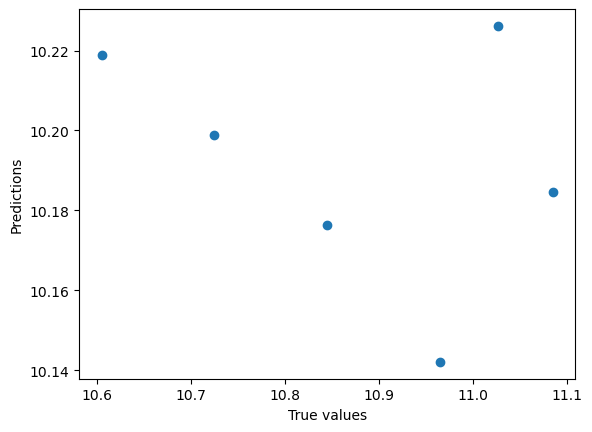

In [26]:
plt.scatter(y_test, y_pred1)
#plt.xticks(np.arange(200, 1100, step=50))
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()